In [1]:
import os, glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.signal import savgol_filter
from scipy.optimize import fmin

In [2]:
def SetRCParms_Martin(): # Set global plotting properties for Nature figures
    mpl.rcParams['text.usetex']                  = False # need to make sure you have dvipng installed in the latex distro 
    mpl.rcParams['axes.formatter.use_mathtext']  = True # When True, use mathtext for scientific
    
    # Saving Settings
    mpl.rcParams['savefig.pad_inches']           = 0.01 # dont want any. 
    mpl.rcParams['savefig.bbox']                 = 'standard' # if you do tight it ends up cutting the data. tight
    mpl.rcParams['savefig.format']               = 'pdf'
    mpl.rcParams['savefig.dpi']                  = 400
    mpl.rcParams['figure.dpi']                   = 400  # needs to be the same as the default saving setting or the saved figures will look different from the generated figures. 
    mpl.rcParams['savefig.transparent']          = False # can be true.
    # The figure subplot parameters.  All dimensions are a fraction of the
    # figure width or height
    mpl.rcParams['figure.subplot.left']          = 0.13  # the left side of the subplots of the figure
    mpl.rcParams['figure.subplot.right']         = 0.975    # the right side of the subplots of the figure
    mpl.rcParams['figure.subplot.bottom']        = 0.12    # the bottom of the subplots of the figure
    mpl.rcParams['figure.subplot.top']           = 0.955    # the top of the subplots of the figure
    mpl.rcParams['figure.subplot.wspace']        = 0.35    # the amount of width reserved for blank space between subplots
    mpl.rcParams['figure.subplot.hspace']        = 0.375    # the amount of height reserved for white space between subplots
    ### LINES
    mpl.rcParams['lines.linewidth']              = 0.75     # line width in points
    mpl.rcParams['lines.marker']                 = '' # 'o'       # the default marker
    mpl.rcParams['lines.markersize']             = 3 
    mpl.rcParams['lines.markeredgewidth']        = 0.5 
    ### Axes settings
    mpl.rcParams['axes.linewidth']               = 0.75    # edge linewidth
    mpl.rcParams['axes.grid']                    = False   # display grid or not
    mpl.rcParams['axes.titlesize']               = 'medium'   # fontsize of the axes title
    mpl.rcParams['axes.labelsize']               = 7.5; # 'medium'  # fontsize of the x any y labels
    mpl.rcParams['axes.labelweight']             = 'normal'  # weight of the x and y labels
    mpl.rcParams['axes.labelcolor']              = 'black'
    mpl.rcParams['axes.labelpad']                = 0.85 # distance from tick labels to axis label
    mpl.rcParams['axes.axisbelow']               = False   # whether axis gridlines and ticks are below the axes elements (lines, text, etc)
    mpl.rcParams['axes.spines.left']             = True
    mpl.rcParams['axes.spines.right']            = True
    mpl.rcParams['axes.spines.bottom']           = True
    mpl.rcParams['axes.spines.top']              = True    
    mpl.rcParams['axes.xmargin']                 = 0.05  # x margin.  See `axes.Axes.margins`
    mpl.rcParams['axes.ymargin']                 = 0.05  # y margin See `axes.Axes.margins`
    mpl.rcParams['axes.formatter.limits']        = -7, 7 # use scientific notation if log10
                                   # of the axis range is smaller than the
                                   # first or larger than the second
    mpl.rcParams['axes.formatter.useoffset']     = True    # If True, the tick label formatter
                                             # will default to labeling ticks relative
                                             # to an offset when the data range is
                                             # small compared to the minimum absolute
                                             # value of the data.
    ### TICKS
    mpl.rcParams['xtick.top']                    = False   # draw ticks on the top side
    mpl.rcParams['xtick.bottom']                 = True   # draw ticks on the bottom side
    mpl.rcParams['xtick.major.size']             = 2.4      # major tick size in points
    mpl.rcParams['xtick.minor.size']             = 1.2      # minor tick size in points
    mpl.rcParams['xtick.major.width']            = 0.5    # major tick width in points
    mpl.rcParams['xtick.minor.width']            = 0.5    # minor tick width in points
    mpl.rcParams['xtick.major.pad']              = 1      # distance to major tick label in points
    mpl.rcParams['xtick.minor.pad']              = 1      # distance to the minor tick label in points
    mpl.rcParams['xtick.labelsize']              = 7.0 # 'small' # fontsize of the tick labels
    mpl.rcParams['xtick.direction']              = 'out'     # direction: in, out, or inout
    mpl.rcParams['ytick.left']                   = True   # draw ticks on the left side
    mpl.rcParams['ytick.right']                  = False  # draw ticks on the right side
    mpl.rcParams['ytick.major.size']             = 2.4      # major tick size in points
    mpl.rcParams['ytick.minor.size']             = 1.2      # minor tick size in points
    mpl.rcParams['ytick.major.width']            = 0.5    # major tick width in points
    mpl.rcParams['ytick.minor.width']            = 0.5    # minor tick width in points
    mpl.rcParams['ytick.major.pad']              = 1      # distance to major tick label in points
    mpl.rcParams['ytick.minor.pad']              = 1      # distance to the minor tick label in points
    mpl.rcParams['ytick.labelsize']              = 7.0 # 'small' # fontsize of the tick labels
    mpl.rcParams['ytick.direction']              = 'out'     # direction: in, out, or inout
    
    ### Legends
    mpl.rcParams['legend.fontsize']              = 6.0 # 'small' # fontsize of legends

    return None

SetRCParms_Martin()
SetRCParms_Martin() # have to run twice?

plt.rcParams['figure.dpi'] = 200

In [3]:
# Tom extra functions
import matplotlib as mpl
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

def terrbar(ax, xdat, ydat, xerr=[], yerr=[], label='', marker='o', ls='none',  colorfrac=0, cmap='bwr', hollow=False, **kwargs):
        if len(xerr) == 0:
                xerr = np.zeros(len(xdat))
        if len(yerr) == 0:
                yerr = np.zeros(len(ydat))

        cmapFunc = mpl.cm.get_cmap(cmap)
        if hollow == False :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc=cmapFunc(colorfrac), 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],0.5), ecolor=cmapFunc(colorfrac), capsize=None, **kwargs)
        else :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc='none', 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],0.5), ecolor=cmapFunc(colorfrac), capsize=None, **kwargs)
            
        
def tplot(ax, xdat, ydat, xerr=[], yerr=[], label='', marker='o', ls='none',  colorfrac=0, cmap='bwr',  **kwargs):
        cmapFunc = mpl.cm.get_cmap(cmap)
        ax.plot(xdat, ydat, label=label, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc='none', 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],0.5),  **kwargs)
            
def scalelocofax(_ax, scaleWidth,scaleHeight,shiftRight,shiftUp):
    _axs1pos_bbox = _ax.get_position()
    _ax.set_position([_axs1pos_bbox.x0 + (shiftRight)*_axs1pos_bbox.width,_axs1pos_bbox.y0+ _axs1pos_bbox.height*(shiftUp),_axs1pos_bbox.width*scaleWidth, _axs1pos_bbox.height*(scaleHeight)])
    
# Make a non-linear colormap for showing correlators 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Want to take colormap at values from 0 to 1 and make values farther from 0.5 equal to values of color closer to 0.5 
colorIndPow = 0.3;
colorIndValsLin = np.array([ii/255.0 for ii in range(256)])
colorIndVals = [(np.sign((ii/255.0 - 0.5))*(np.abs((ii/255.0 - 0.5)*2.0))**colorIndPow + 1)/2.0 for ii in range(256)]

colorIndPow1 = 0.15
expDec = 10

colorIndVals = [(np.sign((ii/255.0 - 0.5))*(np.abs((ii/255.0 - 0.5)*2.0))**colorIndPow1*(1-np.exp(-expDec*np.abs((ii/255.0 - 0.5)*2.0)))/(1-np.exp(-expDec)) + 
                 1 )/2.0 for ii in range(256)]
# plt.plot(colorIndVals)

bwrArray = np.array([mpl.cm.get_cmap('bwr')(ii) for ii in colorIndVals])
# numToSetAtEnd = 4
# bwrArray[0:numToSetAtEnd] = mpl.cm.get_cmap('jet')(0) # make it slightly darker
# bwrArray[-1-numToSetAtEnd:-1] = mpl.cm.get_cmap('jet')(0.99999)
bwr_nonlinear_cmap = ListedColormap(bwrArray, name = 'bwr_nonlinear')

# Data

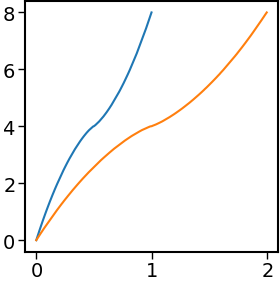

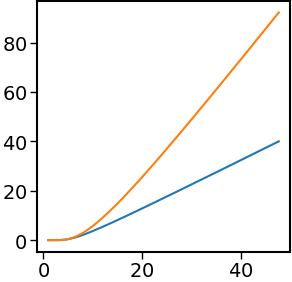

In [17]:
# Define energy spectrum of single particles and get Fermi energy 

numHalfKSpace = 200 # number of grid points from 0 to pi in momentum space 
kxgrid, kygrid = np.meshgrid(np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)), np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)))
numStates = np.sum(np.ones(kxgrid.shape))
ekgrid = (-2*np.cos(kxgrid)+ -2*np.cos(kygrid)+4)
kAmpgrid = np.sqrt(kxgrid**2 + kygrid**2)
Ekepsilonadd = 0.00000000000001/numStates # To prevent division by 0

def FH_get_n_And_Ef():    
    EfTestVals = np.linspace(0,8,1000)
    natekTestVals = np.linspace(0,1,1000)
    
    for ind, Ef in enumerate(EfTestVals) :
        fracK = np.sum(np.where(ekgrid < Ef,1,0))/numStates
        natekTestVals[ind] = fracK

    return natekTestVals, EfTestVals # Report the normalized Fermi Energy at a given single particle density 

nFH_FS, EfH_FS = FH_get_n_And_Ef()    # This is for single species
n2speciesFH_FS = 2*nFH_FS
Ef2speciesFH_FS = EfH_FS

def FH_get_Efofden(_den) :
    func = scipy.interpolate.interp1d(n2speciesFH_FS, EfH_FS) 
    _Ef = np.abs(func(_den))
    return _Ef

# Get bound state energy for 2 particles vs U 
Ebtab_datagen = np.linspace(0.000000001,1,2000)**2 *100 # Have to make it start out at really small Eb values to get it right on interpolation 
UofEbtab_datagen = np.array([1.0/(np.sum(1.0/(Ebval  + 2*ekgrid))/numStates) for Ebval in Ebtab_datagen])

# Get interpolating function 
def FH_get_EbofU(_Uval) :
    func = scipy.interpolate.interp1d(UofEbtab_datagen, Ebtab_datagen) 
    _Eb = np.abs(func(_Uval))
    return _Eb

def FH_get_sqrt2EbEfofUAndden(_Uval, _den) :
    _Eb = np.abs(FH_get_EbofU(_Uval))
    _Ef = np.abs(FH_get_Efofden(_den))
    return np.sqrt(2.0*_Eb*_Ef)

# Plot a few things for reference
fig, axs = plt.subplots(1, figsize=(1.5, 1.5))
plt.plot(nFH_FS,EfH_FS)
plt.plot(n2speciesFH_FS, Ef2speciesFH_FS)

plt.show()

def FH_get_UofEb_Analytic(_Ebval) :
    func = 1.0/((2/np.pi)*(1/(8+_Ebval))*scipy.special.ellipk((8/(_Ebval+8))**2 )) # Have to square the input to be consistent with definitions in reference  https://doi.org/10.1103/PhysRev.132.85 
    return func


def FH_get_ApproxEbofU_Analytic(_Uval) :
    # from Wortis 
    return 64.0/(np.exp(8*np.pi/_Uval)-1)

Eb_Analytictab = np.linspace(0.00001, 1,1000)**2*40
UofEb_Analytictab = np.vectorize(FH_get_UofEb_Analytic)(Eb_Analytictab)
ApproxEb_Analytictab = np.vectorize(FH_get_ApproxEbofU_Analytic)(UofEb_Analytictab)

fig, axs = plt.subplots(1, figsize=(1.5, 1.5))
plt.plot(UofEb_Analytictab,Eb_Analytictab)
plt.plot(UofEb_Analytictab,ApproxEb_Analytictab)

plt.show()


In [5]:
# A general function to get mu and delta at fixed temp, n, and U

# First define forward functions 
############################### NOTE THERE IS LARGE NUMERICAL error on Uval and delta at small delta because its taking ratios of small numbers
# Get values of n and U at each mu and Delta and get interpolating function
def FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
    xikgrid = ekgrid - _muMeanFieldNeglected
    Ekgrid = np.sqrt(xikgrid**2 + _Delta**2)+Ekepsilonadd
    _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
    return _den
def FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
    xikgrid = ekgrid - _muMeanFieldNeglected
    Ekgrid = np.sqrt(xikgrid**2 + _Delta**2)+Ekepsilonadd
    _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
    return _Uval

# Now get inverse functions to get muMeanFieldNeglected and Delta at a given n and U. 
def FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired): 
    # This internal function just defines a quadratic error function to minimize to get close to the desired n and U. It's just (U-Uactual)^2 + (n -nactual)^2 roughly
        # It has a bit of weird format to be able to feed it to fmin function 
    def funcToMinFor_muMeanFieldNeglectedAndDelta(_inputsVals, *_extraVals): # inputs should be [_muMeanFieldNeglected, _Delta] and _extraVals should be [_Udesired, _dendesired]
        _Uerr = ((_extraVals[0] - FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_inputsVals[0], _inputsVals[1], _Tempdesired))/8)**2
        _nerr = (_extraVals[1] - FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_inputsVals[0], _inputsVals[1], _Tempdesired))**2
        # Also force it to have positive delta 
        return (_Uerr)**(1/2) + 10*(_nerr)**(1/2) + 1000*np.heaviside(-_inputsVals[1],0) # For some reason adding the sqrt here makes things converge much better 
            # Have to make it really care about n because U is already really sensitive
    
    if _Udesired > 4 :
        _DeltaGuess = (_Udesired/2)*np.sqrt(_dendesired*(2-_dendesired))
    else :
        _DeltaGuess = 8*np.sqrt(_dendesired*(2-_dendesired))*np.exp(-8/_Udesired)
    # _DeltaGuess = np.sqrt(_dendesired*(2-_dendesired))*((_Udesired)/1.8*np.tanh(_Udesired) + np.exp(_Udesired)*(1- np.tanh(_Udesired))-1) # For small values of U, guess a delta that is much smaller 
    guessesMuMeanFieldNeglectedDelta = [3.9*_dendesired,_DeltaGuess] 
    _muMeanFieldNeglectedval, _Deltaval = fmin(funcToMinFor_muMeanFieldNeglectedAndDelta, np.array(guessesMuMeanFieldNeglectedDelta),args = (_Udesired,_dendesired) , disp = False, xtol = 0.00000000001,ftol = 0.00000000001) # function, guess, extra args, 
    
    #print(_muMeanFieldNeglectedval, _Deltaval)
    #guessesMuMeanFieldNeglectedDelta = [_muMeanFieldNeglectedval, _Deltaval]
    #_muMeanFieldNeglectedval, _Deltaval = fmin(funcToMinFor_muMeanFieldNeglectedAndDelta, np.array(guessesMuMeanFieldNeglectedDelta),args = (_Udesired,_dendesired) , disp = False, xtol = 0.00000000001,ftol = 0.00000000001) # function, guess, extra args, 
    #print(_muMeanFieldNeglectedval, _Deltaval)
    
#     # Check error on result
#     Utol = 0.01
#     dentol = 0.001
#     _Uresult = FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
#     _denresult = FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
#     if np.abs(_Uresult - _Udesired)> Utol:
#         print("Desired params: _Udesired, _dendesired, _Tempdesired: ", _Udesired, _dendesired, _Tempdesired)
#         print("     Error on U = ", np.abs(_Uresult - _Udesired))
#     if np.abs(_denresult - _dendesired)> dentol:
#         print("Desired params: _Udesired, _dendesired, _Tempdesired: ", _Udesired, _dendesired, _Tempdesired)
#         print("     Error on n = ", np.abs(_denresult - _dendesired))
    
    return _muMeanFieldNeglectedval, _Deltaval

# FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(1.5,0.1, 0.72)
# FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(1.5,0.8, 0.72)
print(FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(1.0,0.8, 0.0001))

(3.583588055775663, 0.022780526938435793)


In [6]:
# Now get spin susceptibility at a given temperature 

def FH_get_chi_m_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired):
    # Get spectrum
    _muMeanFieldNeglectedval, _Deltaval = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired)
    xikgrid = ekgrid - _muMeanFieldNeglectedval
    Ekgrid = np.sqrt(xikgrid**2 + _Deltaval**2)+Ekepsilonadd
    # Now get chi sum formula 
    _chi_m = (1.0/numStates)*(2.0/_Tempdesired)*np.sum(np.exp(-Ekgrid/_Tempdesired)/(1+np.exp(-Ekgrid/_Tempdesired))**2)
    return _chi_m

In [7]:
# Get k space occupancy of each state at finite temperature
def FH_get_kspaceocc_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired): 
    # Get spectrum
    _muMeanFieldNeglectedval, _Deltaval = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired)
    xikgrid = ekgrid - _muMeanFieldNeglectedval
    Ekgrid = np.sqrt(xikgrid**2 + _Deltaval**2)+Ekepsilonadd
    # Now get occupancy
    return (1-(xikgrid*np.tanh(Ekgrid/(2*_Tempdesired))/Ekgrid))/2 # I think this will work at finite temperature without a gap? At zero temperature it is just vk^2

In [8]:
# Get k space trace of some matrix 
def get_kspaceTracegrid(datagrid, kxgrid, kygrid):
    def get_scan1(_grid): return _grid[numHalfKSpace, :][numHalfKSpace:] # This is from kx 0 to pi with ky at 0
    def get_scan2(_grid): return _grid[:,-1][numHalfKSpace+1:] # This is from kx= pi with ky at 0 to pi
    def get_scan3(_grid): return np.array([_grid[2*numHalfKSpace-1-ind,2*numHalfKSpace-1-ind] for ind in range(numHalfKSpace)]) # This is from kx= pi with ky pi back to 0, 0 
    def get_fullscan(_grid): return np.append(np.append(get_scan1(_grid),get_scan2(_grid)),get_scan3(_grid))
    
    onesarr = np.ones(kxgrid.shape)
    datagrid1d = get_fullscan(datagrid)
    kxgrid1d = get_fullscan(kxgrid)
    kygrid1d = get_fullscan(kygrid)
    
    majorLocs_traceBZ = [0]
    majorLocs_traceBZ.append(numHalfKSpace+1) # pi
    majorLocs_traceBZ.append(2*numHalfKSpace+1) # pi pi
    majorLocs_traceBZ.append(len(datagrid1d)) # end 
    majorLocsNames_traceBZ = ['(0,0)','($\\pi$,0)','($\\pi$,$\\pi$)','(0,0)']

    return datagrid1d, kxgrid1d, kygrid1d, majorLocs_traceBZ, majorLocsNames_traceBZ

print(FH_get_chi_m_vs_UanddenAndTemp(4,0.8, 0.8))

# print(kxgrid[:,numHalfKSpace]) # so this gives a trace at fixed kx =0
# print(kxgrid[numHalfKSpace, :]) # this gives a trace through kx and ky=0
# print(len(kxgrid[numHalfKSpace, :]))
# print(kxgrid[numHalfKSpace, :][numHalfKSpace:]) # This is from kx 0 to pi with ky at 0
# print(kygrid[:,-1][numHalfKSpace+1:]) # This is from kx= pi with ky at 0 to pi
# print([kxgrid[2*numHalfKSpace-1-ind,2*numHalfKSpace-1-ind] for ind in range(numHalfKSpace)]) # This is from kx= pi with ky pi back to 0, 0 

0.30499256322163604


In [9]:
# New Tstar function to fix density and find U, since it's monotonic and easier to do. So much faster, no error 

def FH_get_Ustar_vs_denAndTstar(_dendesired, _Tstardesired): 
    # For a given T*
    
    # Get values of n and U at each mu with delta=0 and get interpolating function
    def FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2) +Ekepsilonadd # no delta
        _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
        return _den
    def FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2) +Ekepsilonadd # no delta
        _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
        return _Uval
    
    def funcToMinFor_U(_inputsVal, *_extraVals): # inputs should be mu guess _extraVals should be [_dendesired, _Tstardesired]
        # First get these
        _nStar = FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_inputsVal[0],_extraVals[1])
        _nerr = (_extraVals[0] - _nStar)**2
        return (_nerr)**(1) # For some reason adding the sqrt here makes things converge much better 
            # Have to make it really care about n because U is already really sensitive
        
    _muGuess = 3.9*_dendesired 
    _guessVals = [_muGuess]
    _muval = fmin(funcToMinFor_U, _guessVals,args = (_dendesired, _Tstardesired) , disp = False) # function, guess, extra args, 
    
    _nStar = FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_muval, _Tstardesired)
    _UStar = FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_muval, _Tstardesired)
    
    return _Tstardesired, _UStar, _nStar


In [10]:
# Get temperature where gap disappears at any U/t and density 
# We can use the analytic formulas for U and n when delta = 0 and self consistently solve them to get $T*$. Should be more computationally efficient than doing something numerical 

def FH_get_Tstar_vs_Uandden(_Udesired, _dendesired): 
    # Get values of n and U at each mu with delta=0 and get interpolating function
    def FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2)+Ekepsilonadd # no delta
        _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
        return _den
    def FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2)+Ekepsilonadd # no delta
        _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
        return _Uval
    
    def funcToMinFor_Temp(_inputsVal, *_extraVals): # inputs should be mu guess and temp guess and _extraVals should be [_Udesired, _dendesired]
        # First get these
        _UStar = FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_inputsVal[0],_inputsVal[1])
        _nStar = FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_inputsVal[0],_inputsVal[1])
        _Uerr = ((_extraVals[0] - _UStar)/8)**2
        _nerr = (_extraVals[1] - _nStar)**2
        return (_Uerr)**(1) + 10*(_nerr)**(1) # For some reason adding the sqrt here makes things converge much better 
            # Have to make it really care about n because U is already really sensitive
        
    _muGuess = 3.9*_dendesired
    if _Udesired > 4 :
        _DeltaGuess = (_Udesired/2)*np.sqrt(_dendesired*(2-_dendesired))
    else :
        _DeltaGuess = 8*np.sqrt(_dendesired*(2-_dendesired))*np.exp(-8/_Udesired)
        
    # Get 0 temperature delta
    _muTemp, _DeltaTemp = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, 0.00000001)
    # print(_DeltaGuess, _DeltaTemp)
    
    _TGuess = _DeltaTemp/2.5
    _guessVals = [_muGuess, _TGuess]
    _muval, _Tempval = fmin(funcToMinFor_Temp, _guessVals,args = (_Udesired,_dendesired) , disp = False) # function, guess, extra args, 
    
    _guessVals = [_muval, _TGuess]
    _muval, _Tempval = fmin(funcToMinFor_Temp, _guessVals,args = (_Udesired,_dendesired) , disp = False) # function, guess, extra args, 
    return _Tempval


# print(FH_get_Tstar_vs_Uandden(20, 0.8))
print(FH_get_Tstar_vs_Uandden(1.35, 0.8))

0.05242653089685405


### Plot some results

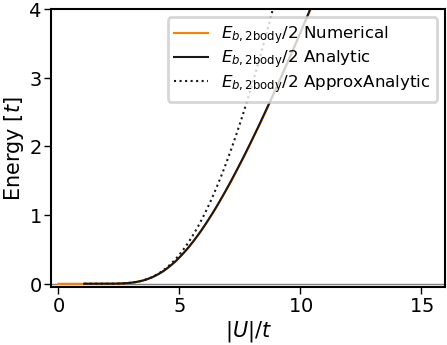

In [13]:
# Simple Eb plot of analytic solution

# Generate data 

TempTest = 0.0001
nTest = 0.05
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 16
EmaxPlt = UmaxPlt/4


Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

Ebtab = FH_get_EbofU(Utab)

######################## Plot ######################## 
fig, axs = plt.subplots(1, figsize=(3.5/1.5, 2.5/1.5))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

tplot(axs, Utab, Ebtab, marker='', ls='-', colorfrac=0.5, cmap='autumn', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$ Numerical')
tplot(axs, UofEb_Analytictab,Eb_Analytictab, marker='', ls='-', colorfrac=0.1, cmap='gray', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$ Analytic')
tplot(axs, UofEb_Analytictab,ApproxEb_Analytictab, marker='', ls='dotted', colorfrac=0.1, cmap='gray', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$ ApproxAnalytic')

axs.hlines(0,-2,UmaxPlt, color = 'gray', linewidth = linewidth0)

axs.set_xlabel('$|U|/t$')
axs.set_ylabel('Energy $[t]$')
axs.set_xlim([ -0.3,UmaxPlt])
axs.set_ylim( [-0.05,EmaxPlt])
axs.legend(labelspacing=0.1)

plt.show()


# fig.savefig('GapPlots/Fig_2BodyBindingEnergy_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')


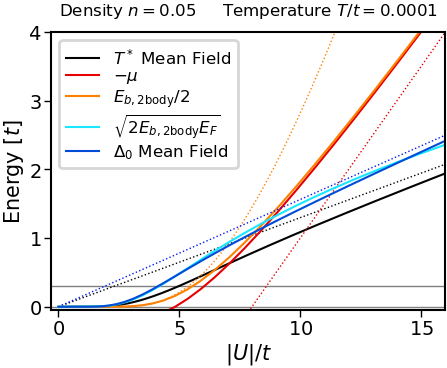

In [15]:
# Generate data 

TempTest = 0.0001
nTest = 0.05
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 16
EmaxPlt = UmaxPlt/4


# Tstartab = np.array([FH_get_Tstar_vs_Uandden(Uval, nTest) for Uval in Utab]) # This one is slow
TstartabIn = np.linspace(0.0000000000001, 1,400)**3*EmaxPlt
Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(nTest, TstartabIn)

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]
mutab = muMeanFieldNeglectedtab - Utab*nTest/2.0
Ebtab = FH_get_EbofU(Utab)
ApproxEbtab = FH_get_ApproxEbofU(Utab)

# chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(Uval, nTest, TempTest) for Uval in Utab])
twoDGaptab = np.array([FH_get_sqrt2EbEfofUAndden(Uval, nTest) for Uval in Utab])



######################## Plot ######################## 
fig, axs = plt.subplots(1, figsize=(3.5/1.5, 2.5/1.5))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

axs.hlines(FH_get_Efofden(nTest),-2,UmaxPlt, color = 'gray', linewidth = linewidth0, ls = '-')

cfracTstar = 0.01
tplot(axs, Ustartab, Tstartab, marker='', ls='-', colorfrac=cfracTstar, cmap='gray', ms= msglob,label = '$T^*$ Mean Field')
tplot(axs, Utab, Utab/4.0*(1-nTest)/np.arctanh(1-nTest), marker='', ls='dotted', lw = 0.5, colorfrac=cfracTstar, cmap='gray', ms= 0,label = '') # Approx formula for Tstar_lim 

tplot(axs, Utab, -(mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '$-\\mu$')
# tplot(axs, Utab, (mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '', alpha = 0.2)
tplot(axs, Utab, (Utab-8)/2, marker='', ls='dotted', colorfrac=0.8, cmap='seismic', ms= 0, lw = 0.5, label = '')
tplot(axs, Utab, Ebtab/2.0, marker='', ls='-', colorfrac=0.5, cmap='autumn', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$')
tplot(axs, UofEb_Analytictab,ApproxEb_Analytictab/2.0, marker='',ls='dotted', colorfrac=0.5,lw = 0.5, cmap='autumn', ms= msglob,label = '')


tplot(axs, Utab, Utab/2.0*np.sqrt(nTest*(2-nTest)), marker='', ls='dotted', lw = 0.5, colorfrac=0.1, cmap='winter', ms= 0,label = '') # Approx formula for Delta_lim 
tplot(axs, Utab, twoDGaptab, marker='', ls='-', colorfrac=0.1, cmap='cool', ms= 5,label = '$\\sqrt{2 E_{b, {\\rm 2 body}} E_F}$')
tplot(axs, Utab, Deltatab, marker='', ls='-', colorfrac=0.3, cmap='winter', ms= msglob,label = '$\\Delta_0$ Mean Field')


axs.hlines(0,-2,UmaxPlt, color = 'gray', linewidth = linewidth0)

axs.set_xlabel('$|U|/t$')
axs.set_ylabel('Energy $[t]$')
axs.set_xlim([ -0.3,UmaxPlt])
axs.set_ylim( [-0.05,EmaxPlt])
axs.legend(labelspacing=0.1)

axs.set_title('Density $n=$'+str(nTest) + '     Temperature $T/t=$'+str(TempTest), size = 6)

plt.show()


fig.savefig('GapPlots/Fig_2BodyBindingEnergy_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

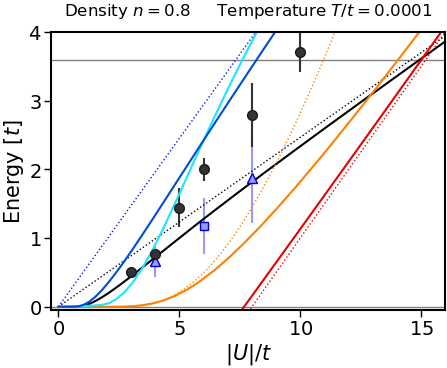

In [20]:
# Generate data 

TempTest = 0.0001
nTest = 0.8
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 16
EmaxPlt = UmaxPlt/4


# Tstartab = np.array([FH_get_Tstar_vs_Uandden(Uval, nTest) for Uval in Utab]) # This one is slow
TstartabIn = np.linspace(0.0000000000001, 1,400)**3*EmaxPlt
Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(nTest, TstartabIn)

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]
mutab = muMeanFieldNeglectedtab - Utab*nTest/2.0
Ebtab = FH_get_EbofU(Utab)
ApproxEbtab = FH_get_ApproxEbofU(Utab)

# chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(Uval, nTest, TempTest) for Uval in Utab])
twoDGaptab = np.array([FH_get_sqrt2EbEfofUAndden(Uval, nTest) for Uval in Utab])


dataMarkersize = 3.5
SingerUovt8_Delta = 3.75/2.0 
SingerUovt6_Delta = 2.35/2.0
SingerUovt4_Delta = 1.33/2.0 # about 35% error on each of these 
SingerErrorScaling = 0.35

Fontenele_Uovt_vals = [3,4,5,6,8,10]
Fontenele_Tstar_vals = [0.5,0.77,1.44,2,2.79,3.71]
Fontenele_Tstar_errs = np.array([0.1,0.06,0.57,0.34,0.94,0.59])/2.0 # I measured full length of error bars, have to input half to plotter




######################## Plot ######################## 
fig, axs = plt.subplots(1, figsize=(3.5/1.5, 2.5/1.5))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

axs.hlines(FH_get_Efofden(nTest),-2,UmaxPlt, color = 'gray', linewidth = linewidth0, ls = '-')

cfracTstar = 0.01
tplot(axs, Ustartab, Tstartab, marker='', ls='-', colorfrac=cfracTstar, cmap='gray', ms= msglob,label = '$T^*$ Mean Field')
tplot(axs, Utab, Utab/4.0*(1-nTest)/np.arctanh(1-nTest), marker='', ls='dotted', lw = 0.5, colorfrac=cfracTstar, cmap='gray', ms= 0,label = '') # Approx formula for Tstar_lim 

tplot(axs, Utab, -(mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '$-\\mu$')
# tplot(axs, Utab, (mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '', alpha = 0.2)
tplot(axs, Utab, (Utab-8)/2, marker='', ls='dotted', colorfrac=0.8, cmap='seismic', ms= 0, lw = 0.5, label = '')
tplot(axs, Utab, Ebtab/2.0, marker='', ls='-', colorfrac=0.5, cmap='autumn', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$')
tplot(axs, UofEb_Analytictab,ApproxEb_Analytictab/2.0, marker='',ls='dotted', colorfrac=0.5,lw = 0.5, cmap='autumn', ms= msglob,label = '')

tplot(axs, Utab, Utab/2.0*np.sqrt(nTest*(2-nTest)), marker='', ls='dotted', lw = 0.5, colorfrac=0.1, cmap='winter', ms= 0,label = '') # Approx formula for Delta_lim 
tplot(axs, Utab, twoDGaptab, marker='', ls='-', colorfrac=0.1, cmap='cool', ms= 5,label = '$\\sqrt{2 E_{b, {\\rm 2 body}} E_F}$')
tplot(axs, Utab, Deltatab, marker='', ls='-', colorfrac=0.3, cmap='winter', ms= msglob,label = '$\\Delta_0$ Mean Field')

# Singer data
terrbar(axs, [6], [SingerUovt6_Delta], yerr= [SingerErrorScaling*SingerUovt6_Delta], marker='s', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize/1.2,label = '$\\Delta_0$ Singer98')
terrbar(axs, [4,8], [SingerUovt4_Delta, SingerUovt8_Delta], yerr= [SingerErrorScaling*SingerUovt4_Delta, SingerErrorScaling*SingerUovt8_Delta], marker='^', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize,label = '$\\Delta_0$ Singer96')

# Fontenele data
terrbar(axs, Fontenele_Uovt_vals, Fontenele_Tstar_vals, yerr= Fontenele_Tstar_errs, marker='o', ls='', colorfrac=0.2, cmap='gray', ms= dataMarkersize,label = '$T^*$ Fontenele2022')


axs.hlines(0,-2,UmaxPlt, color = 'gray', linewidth = linewidth0)

axs.set_xlabel('$|U|/t$')
axs.set_ylabel('Energy $[t]$')
axs.set_xlim([ -0.3,UmaxPlt])
axs.set_ylim( [-0.05,EmaxPlt])
# axs.legend(labelspacing=0.1)

axs.set_title('Density $n=$'+str(nTest) + '     Temperature $T/t=$'+str(TempTest), size = 6)

plt.show()


fig.savefig('GapPlots/Fig_2BodyBindingEnergy_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

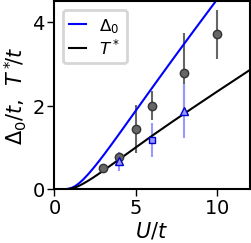

In [40]:
# Generate data 

TempTest = 0.0001
nTest = 0.8
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 12
EmaxPlt = 4.5


# Tstartab = np.array([FH_get_Tstar_vs_Uandden(Uval, nTest) for Uval in Utab]) # This one is slow
TstartabIn = np.linspace(0.0000000000001, 1,400)**3*EmaxPlt
Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(nTest, TstartabIn)

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]
mutab = muMeanFieldNeglectedtab - Utab*nTest/2.0
Ebtab = FH_get_EbofU(Utab)
ApproxEbtab = FH_get_ApproxEbofU(Utab)

chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(Uval, nTest, TempTest) for Uval in Utab])
twoDGaptab = np.array([FH_get_sqrt2EbEfofUAndden(Uval, nTest) for Uval in Utab])


dataMarkersize = 3
SingerUovt8_Delta = 3.75/2.0 
SingerUovt6_Delta = 2.35/2.0
SingerUovt4_Delta = 1.33/2.0 # about 35% error on each of these 
SingerErrorScaling = 0.35

Fontenele_Uovt_vals = [3,4,5,6,8,10]
Fontenele_Tstar_vals = [0.5,0.77,1.44,2,2.79,3.71]
Fontenele_Tstar_errs = [0.1,0.06,0.57,0.34,0.94,0.59]

######################## Plot ######################## 
fig, axs =  plt.subplots(1, figsize=(1.75, 1.25))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

def scalelocofax(_ax, scaleWidth,scaleHeight,shiftRight,shiftUp):
    _axs1pos_bbox = _ax.get_position()
    _ax.set_position([_axs1pos_bbox.x0 + (shiftRight)*_axs1pos_bbox.width,_axs1pos_bbox.y0+ _axs1pos_bbox.height*(shiftUp),_axs1pos_bbox.width*scaleWidth, _axs1pos_bbox.height*(scaleHeight)])
scalelocofax(axs, 0.66,0.9,0.125,0.1)

# axs.hlines(FH_get_Efofden(nTest),-2,UmaxPlt, color = 'gray', linewidth = linewidth0, ls = '-')

# tplot(axs, Utab, twoDGaptab, marker='', ls='dashed', colorfrac=0.1, cmap='cool', ms= 5,label = '$\\sqrt{2 E_{b, {\\rm 2 body}} E_F}$')
axs.plot(Utab, Deltatab, marker='', ls='-',color = 'blue',  ms= msglob,label = '$\\Delta_0$')
# axs.plot(Utab, Utab/2.0*np.sqrt(nTest*(2-nTest)), marker='', ls='dotted', lw = 0.5, color = 'blue', label = '') # Approx formula for Delta_lim 

cfracTstar = 0.01
tplot(axs, Ustartab, Tstartab, marker='', ls='-', colorfrac=cfracTstar, cmap='gray', ms= msglob,label = '$T^*$')
# tplot(axs, Utab, Utab/4.0*(1-nTest)/np.arctanh(1-nTest), marker='', ls='dotted', lw = 0.5, colorfrac=cfracTstar, cmap='gray', ms= 0,label = '') # Approx formula for Tstar_lim 

# tplot(axs, Utab, -(mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '$-\\mu$')
# # tplot(axs, Utab, (mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '', alpha = 0.2)
# tplot(axs, Utab, (Utab-8)/2, marker='', ls='dotted', colorfrac=0.8, cmap='seismic', ms= 0, lw = 0.5, label = '')
# tplot(axs, Utab, Ebtab/2.0, marker='', ls='dashed', colorfrac=0.5, cmap='autumn', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$')


# Fontenele data
terrbar(axs, Fontenele_Uovt_vals, Fontenele_Tstar_vals, yerr= Fontenele_Tstar_errs, marker='o', ls='', colorfrac=0.4, cmap='gray', ms= dataMarkersize,label = '')#  '$T^*$ Fontenele2022')

# Singer data
terrbar(axs, [6], [SingerUovt6_Delta], yerr= [SingerErrorScaling*SingerUovt6_Delta], marker='s', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize/1.2,label = '')# '$\\Delta_0$ Singer98')
terrbar(axs, [4,8], [SingerUovt4_Delta, SingerUovt8_Delta], yerr= [SingerErrorScaling*SingerUovt4_Delta, SingerErrorScaling*SingerUovt8_Delta], marker='^', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize,label = '')# '$\\Delta_0$ Singer96')


axs.hlines(0,-2,UmaxPlt, color = 'gray', linewidth = linewidth0)

axs.set_xlabel('$U/t$')
axs.set_ylabel('$\\Delta_0/t$,  ${T^*}\\!\\!/t$')
axs.set_xlim([0,UmaxPlt])
axs.set_ylim( [0,EmaxPlt])
axs.legend(labelspacing=0.1, handlelength = 1)

# axs.set_title('Density $n=$'+str(nTest) + '     Temperature $T/t=$'+str(TempTest), size = 6)

    

plt.show()


fig.savefig('GapPlots/Fig_SIFigure_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

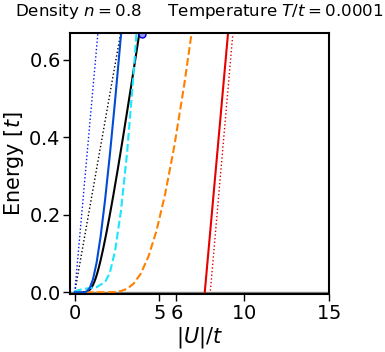

In [25]:
# Data for Fig. 1 of attractive hubbard paper to find T* to plot approximately. 


TempTest = 0.0001
nTest = 0.8
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 16
EmaxPlt = 1


# Tstartab = np.array([FH_get_Tstar_vs_Uandden(Uval, nTest) for Uval in Utab]) # This one is slow
TstartabIn = np.linspace(0.0000000000001, 1,400)**3*EmaxPlt
Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(nTest, TstartabIn)

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]
mutab = muMeanFieldNeglectedtab - Utab*nTest/2.0
Ebtab = FH_get_EbofU(Utab)
ApproxEbtab = FH_get_ApproxEbofU(Utab)

chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(Uval, nTest, TempTest) for Uval in Utab])
twoDGaptab = np.array([FH_get_sqrt2EbEfofUAndden(Uval, nTest) for Uval in Utab])


SingerUovt8_Delta = 3.75/2.0
SingerUovt6_Delta = 2.35/2.0
SingerUovt4_Delta = 1.33/2.0


######################## Plot ######################## 
fig, axs = plt.subplots(1, figsize=(2.3/1.5, 2.35/1.5))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

axs.hlines(FH_get_Efofden(nTest),-2,UmaxPlt, color = 'gray', linewidth = linewidth0, ls = '-')

cfracTstar = 0.01
tplot(axs, Ustartab, Tstartab, marker='', ls='-', colorfrac=cfracTstar, cmap='gray', ms= msglob,label = '$T^*$ Mean Field')
tplot(axs, Utab, Utab/4.0*(1-nTest)/np.arctanh(1-nTest), marker='', ls='dotted', lw = 0.5, colorfrac=cfracTstar, cmap='gray', ms= 0,label = '') # Approx formula for Tstar_lim 

tplot(axs, Utab, -(mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '$-\\mu$')
# tplot(axs, Utab, (mutab), marker='', ls='-', colorfrac=0.8, cmap='seismic', ms= msglob,label = '', alpha = 0.2)
tplot(axs, Utab, (Utab-8)/2, marker='', ls='dotted', colorfrac=0.8, cmap='seismic', ms= 0, lw = 0.5, label = '')
tplot(axs, Utab, Ebtab/2.0, marker='', ls='dashed', colorfrac=0.5, cmap='autumn', ms= msglob,label = '$E_{b, {\\rm 2 body}}/2$')

tplot(axs, Utab, Utab/2.0*np.sqrt(nTest*(2-nTest)), marker='', ls='dotted', lw = 0.5, colorfrac=0.1, cmap='winter', ms= 0,label = '') # Approx formula for Delta_lim 
tplot(axs, Utab, twoDGaptab, marker='', ls='dashed', colorfrac=0.1, cmap='cool', ms= 5,label = '$\\sqrt{2 E_{b, {\\rm 2 body}} E_F}$')
tplot(axs, Utab, Deltatab, marker='', ls='-', colorfrac=0.3, cmap='winter', ms= msglob,label = '$\\Delta_0$ Mean Field')

# Singer data
terrbar(axs, [6], [SingerUovt6_Delta], marker='s', ls='', colorfrac=0.3, cmap='bwr', ms= 2.5,label = '$\\Delta_0$ Singer98')
terrbar(axs, [4,8], [SingerUovt4_Delta, SingerUovt8_Delta], marker='o', ls='', colorfrac=0.3, cmap='bwr', ms= 2.5,label = '$\\Delta_0$ Singer96')

axs.hlines(0,-2,UmaxPlt, color = 'gray', linewidth = linewidth0)

axs.set_xlabel('$|U|/t$')
axs.set_ylabel('Energy $[t]$')
axs.set_xlim([ -0.3,15])
axs.set_ylim( [-0.005,0.67])
# axs.legend(labelspacing=0.1)
axs.set_xticks([0,5,6,10,15])
    
axs.set_title('Density $n=$'+str(nTest) + '     Temperature $T/t=$'+str(TempTest), size = 6)

plt.show()

fig.savefig('GapPlots/Fig_2BodyBindingEnergy_Density_zoomed='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight', transparent = True)

Density n =  0.05


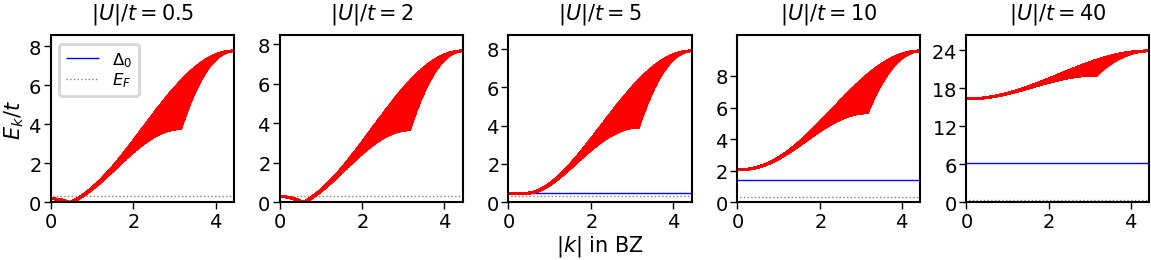

Density n =  0.8


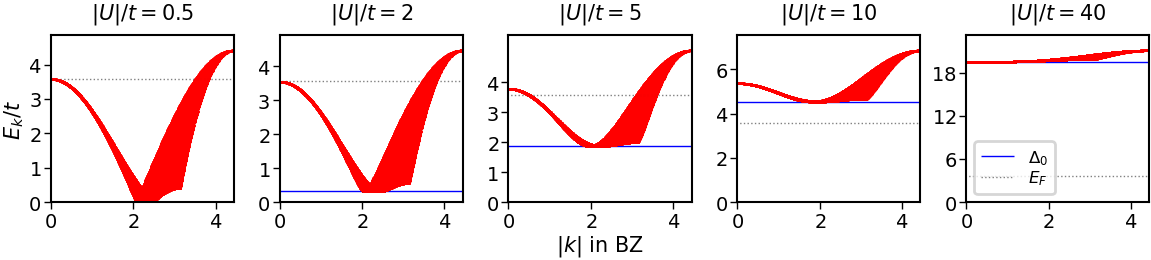

In [45]:
# Let's plot some Ek spectra vs k now. 

UTestArr =  [0.5, 2, 5,  10, 40] # [20, 10,5, 2, 0.5] 
TempTest = 0.0001

nTest = 0.05
EPltMax = 12

fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.3*len(UTestArr), 1))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

for UInd, UTest in enumerate(UTestArr):
    
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest)

    axs[UInd].plot(kAmpgrid.flatten(),Ekgrid.flatten(), marker = '.', ls = '', color = 'red', ms = 0.25)

    axs[UInd].hlines(DeltaTest,-10,10, color = 'blue', linewidth = linewidth0, label = '$\\Delta_0$')
    axs[UInd].hlines(FH_get_Efofden(nTest),-2,25, color = 'gray', linewidth = linewidth0, ls = 'dotted', label = '$E_F$')

    ymin, ymax = axs[UInd].get_ylim()
    ymaxround =np.round(ymax)
    numticks = 4
    tickarr = np.array(list(range(numticks+1)))*np.round(ymaxround/numticks).astype(int)
    axs[UInd].set_yticks(tickarr)

    axs[UInd].set_xlim([ 0, np.sqrt(2)*np.pi])
    axs[UInd].set_ylim( [0, np.max(Ekgrid)*1.1])
    axs[UInd].set_title('$|U|/t=$'+str(UTest), size = 7.5)

axs[0].set_ylabel('$E_k/t$')
axs[2].set_xlabel('$|k|$ in BZ')
axs[0].legend(labelspacing=0.1)
    
fig.subplots_adjust(wspace = 0.25)
                
print('Density n = ', nTest)
plt.show()

fig.savefig('KSpacePlots/Fig_Ek_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')


nTest = 0.8
EPltMax = 14

fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.3*len(UTestArr), 1))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

for UInd, UTest in enumerate(UTestArr):
    
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest)
    
    axs[UInd].plot(kAmpgrid.flatten(),Ekgrid.flatten(), marker = '.', ls = '', color = 'red', ms = 0.25)

    axs[UInd].hlines(DeltaTest,-10,10, color = 'blue', linewidth = linewidth0, label = '$\\Delta_0$')
    axs[UInd].hlines(FH_get_Efofden(nTest),-2,25, color = 'gray', linewidth = linewidth0, ls = 'dotted', label = '$E_F$')

    ymin, ymax = axs[UInd].get_ylim()
    ymaxround =np.round(ymax)
    numticks = 4
    tickarr = np.array(list(range(numticks+1)))*np.round(ymaxround/numticks).astype(int)
    axs[UInd].set_yticks(tickarr)
    
    axs[UInd].set_xlim([ 0, np.sqrt(2)*np.pi])
    axs[UInd].set_ylim( [0, np.max(Ekgrid)*1.1]) #EPltMax]) #
    axs[UInd].set_title('$|U|/t=$'+str(UTest), size = 7.5)
axs[0].set_ylabel('$E_k/t$')
axs[2].set_xlabel('$|k|$ in BZ')
axs[-1].legend(labelspacing=0.1)
    
fig.subplots_adjust(wspace = 0.25)

print('Density n = ', nTest)
plt.show()

fig.savefig('KSpacePlots/Fig_Ek_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

0.02500000000002226 0.013805278778199443
0.024999999999999994 7.559169097785983e-09
0.02500000000000014 9.548178500532358e-08
0.02499999999994977 0.2753125645694542
0.024999999999905778 0.24555405349235482
0.025000000000000095 4.7556259971735036e-08
0.02499999999996594 1.4217055223016746
0.025000000000069574 1.4217055220119534
0.02499999999991567 1.4146980727691054
0.02499999999999907 6.213421002252629
0.024999999999988715 6.213421002249884
0.024999999999965505 6.213421002247625
Density n =  0.05


/Users/thomashartke/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


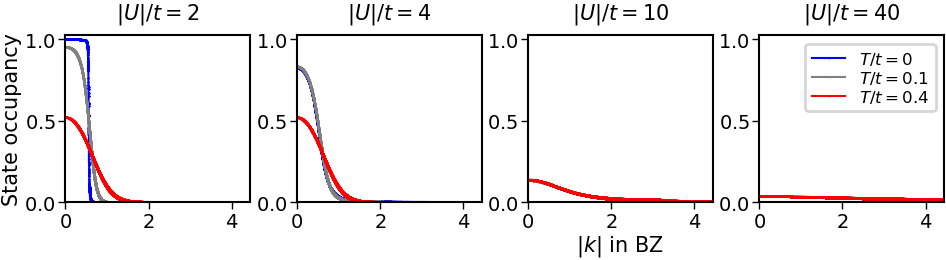

/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


0.400000000000072 0.3234559382454913
0.3999999999999999 3.13431629791037e-08
0.4 1.8677483431390883e-07
0.39999999999996383 1.3315591312535662
0.40000000000003266 1.2843088384975736
0.4 1.2136678754531576e-07
0.40000000000001273 4.540879689938633
0.39999999999996827 4.540867611643228
0.4000000000000481 4.516147759200073
0.40000000000006763 19.4982913557156
0.40000000000006763 19.4982913557156
0.3999999999999561 19.498291355080763
Density n =  0.8


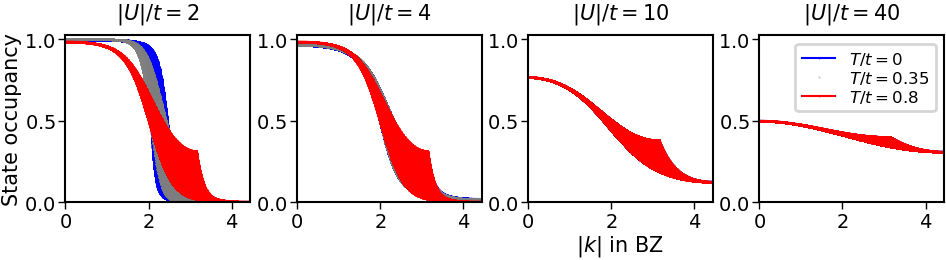

/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [46]:
# Let's plot some Ek spectra vs k now. 

UTestArr =  [2, 4, 10,40] # [20, 10,5, 2, 0.5] 
TempTest1 = 0.0001
TempTest2 = 0.1
TempTest3 = 0.4


nTest = 0.05
EPltMax = 12

fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.3*len(UTestArr), 1))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

for UInd, UTest in enumerate(UTestArr):
    
    # First temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest1)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest1)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '-', color = 'blue', ms = 0.25, label = '$T/t=0$')
    print(np.sum(kspaceoccgrid.flatten())/numStates,DeltaTest)
    
    # Second temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest2)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest2)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '-', color = 'gray', ms = 0.25, label = '$T/t=$'+str(TempTest2))
    print(np.sum(kspaceoccgrid.flatten())/numStates,DeltaTest)
    
    # Third temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest3)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest3)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '-', color = 'red', ms = 0.25, label = '$T/t=$'+str(TempTest3))
    print(np.sum(kspaceoccgrid.flatten())/numStates,DeltaTest)
    
    #axs[UInd].set_xlabel('$|k|$ in BZ')
    #axs[UInd].set_ylabel('$E_k$ $[t]$')
    axs[UInd].set_xlim([ 0, np.sqrt(2)*np.pi])
    axs[UInd].set_ylim( [0, 1.025])
    axs[UInd].set_title('$|U|/t=$'+str(UTest), size = 7.5)

axs[0].set_ylabel('State occupancy')
axs[2].set_xlabel('$|k|$ in BZ')
axs[-1].legend(labelspacing=0.1)
    
fig.subplots_adjust(wspace = 0.25)
                
print('Density n = ', nTest)
plt.show()

fig.savefig('KSpacePlots/Fig_nk_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')



nTest = 0.8
EPltMax = 14
TempTest1 = 0.0001
TempTest2 = 0.35
TempTest3 = 0.8

fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.3*len(UTestArr), 1))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

for UInd, UTest in enumerate(UTestArr):
    
    # First temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest1)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest1)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '-', color = 'blue', ms = 0.25, label = '$T/t=0$')
    print(np.sum(kspaceoccgrid.flatten())/numStates, DeltaTest)
    
    # Second temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest2)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest2)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '', color = 'gray', ms = 0.25, label = '$T/t=$'+str(TempTest2))
    print(np.sum(kspaceoccgrid.flatten())/numStates, DeltaTest)
    
    # Third temp
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest3)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
    vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
    vksqgrid = vkgrid**2 
    kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest3)

    axs[UInd].plot(kAmpgrid.flatten()[np.argsort(kAmpgrid.flatten())],kspaceoccgrid.flatten()[np.argsort(kAmpgrid.flatten())], marker = '.', ls = '-', color = 'red', ms = 0.25, label = '$T/t=$'+str(TempTest3))
    print(np.sum(kspaceoccgrid.flatten())/numStates, DeltaTest)
    
    #axs[UInd].set_xlabel('$|k|$ in BZ')
    #axs[UInd].set_ylabel('$E_k$ $[t]$')
    axs[UInd].set_xlim([ 0, np.sqrt(2)*np.pi])
    axs[UInd].set_ylim( [0, 1.025]) #EPltMax]) #
    axs[UInd].set_title('$|U|/t=$'+str(UTest), size = 7.5)

axs[0].set_ylabel('State occupancy')
axs[2].set_xlabel('$|k|$ in BZ')
axs[-1].legend(labelspacing=0.1)
    
fig.subplots_adjust(wspace = 0.25)

print('Density n = ', nTest)
plt.show()

fig.savefig('KSpacePlots/Fig_nk_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

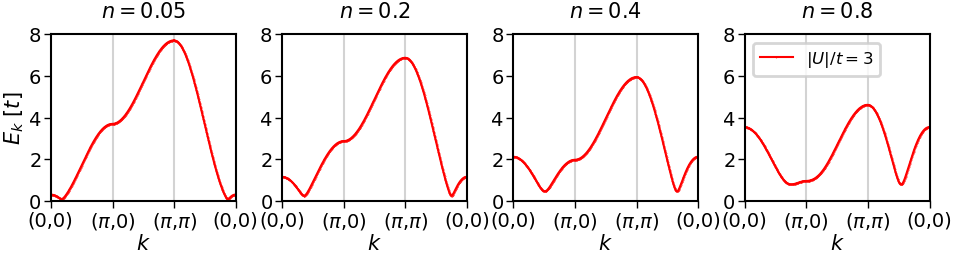

In [47]:
# Let's plot some Ek spectra vs k now. 

nTestArr =  [0.05, 0.2,0.4,0.8]# [20, 10,5, 2, 0.5] 
TempTest = 0.0001
UTest = 3
PltMax = 1.05

PltMax = 8
fig, axs = plt.subplots(1, len(nTestArr), figsize=(1.3*len(nTestArr), 1))
for UInd, nTest in enumerate(nTestArr):
    
    muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest)
    xikgrid = ekgrid - muMeanFieldNeglectedTest
    Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
    Ekgrid1D, kxgrid1D, kygrid1D, majorLocs_traceBZ, majorLocsNames_traceBZ = get_kspaceTracegrid(Ekgrid, kxgrid, kygrid)

    axs[UInd].plot(Ekgrid1D, marker = '.', ls = '-', color = 'red', ms = 0.25, label = '$|U|/t=$'+str(UTest))
    axs[UInd].vlines(majorLocs_traceBZ[1], 0, PltMax, 'lightgray')
    axs[UInd].vlines(majorLocs_traceBZ[2], 0, PltMax, 'lightgray')
    axs[UInd].set_xticks(majorLocs_traceBZ)
    axs[UInd].set_xticklabels(majorLocsNames_traceBZ)
    axs[UInd].set_ylim([0,PltMax])
    axs[UInd].set_xlim([0,majorLocs_traceBZ[3]])
    # axs[UInd].set_yscale('log')
    axs[UInd].set_xlabel('$k$')
    
    fig.subplots_adjust(wspace = 0.25)
    axs[UInd].set_title('$n=$'+str(nTest), size = 7.5)

axs[0].set_ylabel('$E_k$ $[t]$')
axs[-1].legend(loc = 'upper left')
fig.savefig('KSpacePlots/Fig_TraceBZ_U='+str(UTest)+'.png', dpi=400, bbox_inches = 'tight')

##  Chi calculations

In [11]:
# Chi and Delta Vs temperature 

# Generate data 
# UTest = 4
# nTest = 0.2
# numTvals = 100

UTest = 2
nTest = 0.8
numTvals = 100

TstarTest = FH_get_Tstar_vs_Uandden(UTest, nTest)

Temptab = np.linspace(0.001,TstarTest*2,numTvals)

muMeanFieldNeglected0, Delta0 = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, 0.0001)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, Tempval) for Tempval in Temptab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(UTest, nTest, Tempval) for Tempval in Temptab])
chiRPAtab = chitab/(1+UTest*chitab)
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]

In [12]:
# Get minimum Ek for constant Ek formula 
xikgrid = ekgrid - muMeanFieldNeglected0
Ekgrid = np.sqrt(xikgrid**2 + Delta0**2)
minEk = np.min(Ekgrid)

chiLowTApproxWithmutab = (2.0/Temptab)*np.exp(np.sqrt(Delta0**2+(4-muMeanFieldNeglected0)**2)/Temptab)/(1+np.exp(np.sqrt(Delta0**2+(4-muMeanFieldNeglected0)**2)/Temptab))**2
chiLowTApproxWithmuRPAtab = chiLowTApproxWithmutab/(1+UTest*chiLowTApproxWithmutab)
chiLowTApproxEktab = (2.0/Temptab)*np.exp(UTest/2.0/Temptab)/(1+np.exp(UTest/2.0/Temptab))**2
chiLowTApproxEkRPAtab = chiLowTApproxEktab/(1+UTest*chiLowTApproxEktab)

def FH_get_YosidaForm(_betaDelta):  
    # This returns the Yosida form of Chi/ChiN
    _enmax = 20
    _energies = np.array(np.linspace(0,_enmax,100000)).astype(np.float64)
    _integrand = 2*np.exp(np.sqrt(_energies**2 + _betaDelta**2))/(1+np.exp(np.sqrt(_energies**2 + _betaDelta**2)))**2
    return np.sum(_integrand)/len(_energies)*_enmax

chimNormalAtTstar = FH_get_chi_m_vs_UanddenAndTemp(UTest, nTest, TstarTest)
DeltaEffectivetab = Deltatab + (1-np.sign(muMeanFieldNeglectedtab))*np.abs(muMeanFieldNeglectedtab) # True gap 
betaDeltaVals = DeltaEffectivetab/Temptab
chimYosidaNormedtab = np.vectorize(FH_get_YosidaForm)(betaDeltaVals)
chimYosidatab = chimYosidaNormedtab*chimNormalAtTstar
chimYosidatab = np.where(Temptab<TstarTest, chimYosidatab, chitab)
chimYosidaRPAtab = chimYosidatab/(1+UTest*chimYosidatab)

/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app


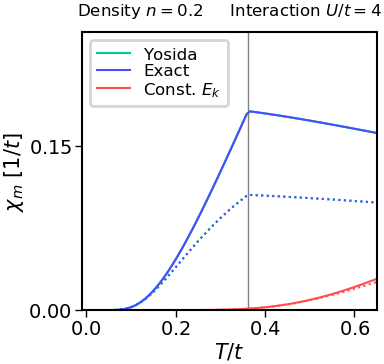

In [13]:
# Plot chi
fig, axs = plt.subplots(1, figsize=(3.5*1.5/2.0/1.5, 2.5/1.5))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
pltHeightScale = 1.4

axs.set_title('Density $n=$'+str(nTest) + '     Interaction $U/t=$'+str(UTest), size = 6)

# Plot chi
tplot(axs, Temptab, chimYosidatab, marker='', ls='-', colorfrac=0.8, cmap='winter', ms= 5,label = 'Yosida')
tplot(axs, Temptab, chimYosidaRPAtab, marker='', ls='dotted', colorfrac=0.8, cmap='winter', ms= 5,label = '')

tplot(axs, Temptab, chitab, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = 'Exact')
tplot(axs, Temptab, chiRPAtab, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '')

tplot(axs, Temptab, chiLowTApproxWithmutab, marker='', ls='-', colorfrac=colorfracRed, cmap='bwr', ms= 5,label = 'Const. $E_k$')
tplot(axs, Temptab, chiLowTApproxWithmuRPAtab, marker='', ls='dotted', colorfrac=colorfracRed, cmap='bwr', ms= 5,label = '')



axs.vlines(TstarTest,-1,10, color = 'gray', linewidth = 0.5)

axs.set_xlabel('$T/t$')
axs.set_ylabel('$\\chi_m$ $[1/t]$')
axs.set_xlim([ -0.01,TstarTest*1.8])
axs.set_ylim([ -0.0001,np.max(chitab)*pltHeightScale])

axs.legend(labelspacing = 0.1, loc = 'upper left')

ymin, ymax = axs.get_ylim()
ymaxround =np.round(ymax*10).astype(float)/10.0
numticks = 2
tickarr = np.array(list(range(numticks+1)))*(ymaxround/numticks)
axs.set_yticks(tickarr)

axs.set_ylim([ -0.0001,np.max(chitab)*pltHeightScale])

# fig.subplots_adjust(wspace = 0.45)

plt.show()

fig.savefig('MuPlots/Fig_Mu_Density='+str(nTest)+'_U='+str(UTest)+'.png', dpi=400, bbox_inches = 'tight')

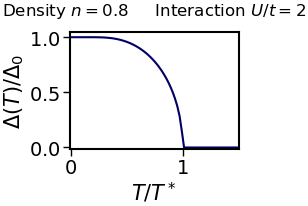

In [108]:
# Plot Delta

# Plot 
fig, axs = plt.subplots(1, figsize=(1.0, 0.7))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

axs.set_title('Density $n=$'+str(nTest) + '     Interaction $U/t=$'+str(UTest), size = 6)

# Plot Delta
terrbar(axs, Temptab/TstarTest, Deltatab/Delta0, marker='', ls='-', colorfrac=0.1, cmap='gnuplot2', ms= 5,label = '$\\Delta(T)$ Mean Field')
axs.set_xlabel('$T/T^*$')
axs.set_ylabel('$\\Delta(T)/\\Delta_0$')
axs.set_xlim([ -0.01,1.5])
axs.set_ylim([ -0.01, 1.05])

plt.show()

fig.savefig('MuPlots/Fig_Delta_Density='+str(nTest)+'_U='+str(UTest)+'.png', dpi=400, bbox_inches = 'tight')

In [109]:
# Get Chi and Delta Vs U/t at fixed temp


TempTest = 0.35
nTest = 0.8
UmaxCalc = 8

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = UmaxCalc

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])

Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
chitab = np.array([FH_get_chi_m_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
chiRPAtab = chitab/(1+ Utab*chitab)
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]

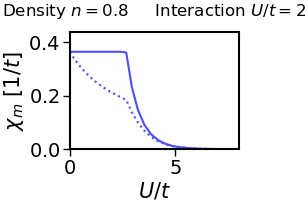

In [110]:
# Chi vs U/t

# Plot 
fig, axs = plt.subplots(1, figsize=(1.0, 0.7))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5

axs.set_title('Density $n=$'+str(nTest) + '     Interaction $U/t=$'+str(UTest), size = 6)

# Plot Delta
tplot(axs, Utab, chitab, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = 'Exact')
tplot(axs, Utab, chiRPAtab, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '')
axs.set_xlabel('$U/t$')
axs.set_ylabel('$\\chi_m$ $[1/t]$')
axs.set_xlim([ -0.01,UmaxPlt])
axs.set_ylim([ -0.0001,np.max(chitab)*1.2])

plt.show()

fig.savefig('MuPlots/Fig_MuVsUovert_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

In [106]:
# # Vs temperature 

# # Plot 
# fig, axs = plt.subplots(1,2, figsize=(3.5, 2.5/2))
# colorfracRed = 0.85
# colorfracBlue = 0.15
# linewidth0 = 0.5

# axs[0].set_title('Density $n=$'+str(nTest) + '     Interaction $U/t=$'+str(UTest), size = 6)

# # Plot Delta
# terrbar(axs[0], Temptab/TstarTest, Deltatab/Delta0, marker='', ls='-', colorfrac=0.1, cmap='gnuplot2', ms= 5,label = '$\\Delta(T)$ Mean Field')
# axs[0].set_xlabel('$T/T^*$')
# axs[0].set_ylabel('$\\Delta(T)/\\Delta_0$')
# axs[0].set_xlim([ -0.01,1.5])
# axs[0].set_ylim([ -0.01, 1.05])

# # Plot chi
# tplot(axs[1], Temptab, chitab, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = 'Exact $E_k$')
# tplot(axs[1], Temptab, chiRPAtab, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '')
# tplot(axs[1], Temptab, chiLowTApproxWithmutab, marker='', ls='-', colorfrac=colorfracRed, cmap='bwr', ms= 5,label = 'Const. $E_k$')
# tplot(axs[1], Temptab, chiLowTApproxWithmuRPAtab, marker='', ls='dotted', colorfrac=colorfracRed, cmap='bwr', ms= 5,label = '')
# # tplot(axs[1], Temptab, chiLowTApproxEktab, marker='', ls='-', colorfrac=0.9, cmap='winter', ms= 5,label = 'E_k=U/2')
# # tplot(axs[1], Temptab, chiLowTApproxEkRPAtab, marker='', ls='dotted', colorfrac=0.9, cmap='winter', ms= 5,label = '')


# tplot(axs[1], Temptab, chimYosidatab, marker='', ls='-', colorfrac=0.8, cmap='winter', ms= 5,label = 'Yosida')
# tplot(axs[1], Temptab, chimYosidaRPAtab, marker='', ls='dotted', colorfrac=0.8, cmap='winter', ms= 5,label = '')

# axs[1].vlines(TstarTest,-1,10, color = 'gray', linewidth = 0.5)

# axs[1].set_xlabel('Temperature $[t]$')
# axs[1].set_ylabel('$\\chi_m$ $[1/t]$')
# axs[1].set_xlim([ -0.01,TstarTest*1.2])
# axs[1].set_ylim([ -0.01,max(np.max(chiLowTApproxWithmutab[~np.isnan(chiLowTApproxWithmutab)]),np.max(chitab))*1.01])

# # axs[1].legend(labelspacing = 0.1)

# fig.subplots_adjust(wspace = 0.45)

# plt.show()

# # fig.savefig('MuPlots/Fig_Mu_Density='+str(nTest)+'_U='+str(UTest)+'.png', dpi=400, bbox_inches = 'tight')

In [107]:
# # Let's plot some Ek spectra vs k now. 

# UTestArr =  [0.5, 2, 4, 6,  10]# [20, 10,5, 2, 0.5] 
# TempTest = 0.0001
# nTest = 0.8
# PltMax = 1.05

# fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.3*len(UTestArr), 1))
# for UInd, UTest in enumerate(UTestArr):
    
#     muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest)
#     kspaceoccgrid = FH_get_kspaceocc_vs_UanddenAndTemp(UTest, nTest, TempTest)
#     xikgrid = ekgrid - muMeanFieldNeglectedTest
#     Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
#     ukgrid = np.sqrt((1.0/2)*(1 + xikgrid/Ekgrid)) 
#     vkgrid = np.sqrt((1.0/2)*(1 - xikgrid/Ekgrid)) # This is the occupancy of each state
#     vksqgrid = vkgrid**2 
#     ukvkgrid = ukgrid*vkgrid
    
#     vksqgrid1D, kxgrid1D, kygrid1D, majorLocs_traceBZ, majorLocsNames_traceBZ = get_kspaceTracegrid(vksqgrid, kxgrid, kygrid)
#     ukvkgrid1D, kxgrid1D, kygrid1D, majorLocs_traceBZ, majorLocsNames_traceBZ = get_kspaceTracegrid(ukvkgrid, kxgrid, kygrid)
#     kspaceoccgrid1D, kxgrid1D, kygrid1D, majorLocs_traceBZ, majorLocsNames_traceBZ = get_kspaceTracegrid(kspaceoccgrid, kxgrid, kygrid)

#     axs[UInd].plot(ukvkgrid1D, marker = '.', ls = '-', color = 'red', ms = 0.25)
#     axs[UInd].plot(kspaceoccgrid1D, marker = '.', ls = '-', color = 'blue', ms = 0.25)
#     axs[UInd].vlines(majorLocs_traceBZ[1], 0, PltMax, 'lightgray')
#     axs[UInd].vlines(majorLocs_traceBZ[2], 0, PltMax, 'lightgray')
#     axs[UInd].set_xticks(majorLocs_traceBZ)
#     axs[UInd].set_xticklabels(majorLocsNames_traceBZ)
#     axs[UInd].set_ylim([0,PltMax])
    
#     axs[UInd].set_title('$U/t=$'+str(UTest), size = 8)
    
# PltMax = 10
# fig, axs = plt.subplots(1, len(UTestArr), figsize=(1.8*len(UTestArr), 1.3))
# for UInd, UTest in enumerate(UTestArr):
    
#     muMeanFieldNeglectedTest, DeltaTest = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(UTest, nTest, TempTest)
#     xikgrid = ekgrid - muMeanFieldNeglectedTest
#     Ekgrid = np.sqrt(xikgrid**2 + DeltaTest**2)
#     Ekgrid1D, kxgrid1D, kygrid1D, majorLocs_traceBZ, majorLocsNames_traceBZ = get_kspaceTracegrid(Ekgrid, kxgrid, kygrid)

#     axs[UInd].plot(Ekgrid1D, marker = '.', ls = '-', color = 'green', ms = 0.25)
#     axs[UInd].vlines(majorLocs_traceBZ[1], 0, PltMax, 'lightgray')
#     axs[UInd].vlines(majorLocs_traceBZ[2], 0, PltMax, 'lightgray')
#     axs[UInd].set_xticks(majorLocs_traceBZ)
#     axs[UInd].set_xticklabels(majorLocsNames_traceBZ)
#     axs[UInd].set_ylim([0,PltMax])
    
#     axs[UInd].set_title('$U/t=$'+str(UTest), size = 7.5)


In [ ]:
# # Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
# UmaxPlt = 40
# EmaxPlt = UmaxPlt/2

# fig, axs = plt.subplots(1, figsize=(3.5/2, 2.5/2))
# colorfracRed = 0.85
# colorfracBlue = 0.15
# linewidth0 = 0.5
# msglob = 0

# cfracTstar = 0.01
# tplot(axs, Utab, Tstartab/Deltatab, marker='', ls='-', colorfrac=cfracTstar, cmap='seismic', ms= msglob,label = 'Exact')
# axs.hlines(np.exp(np.euler_gamma)/np.pi,-2,UmaxPlt, color = 'gray', linewidth = linewidth0, label = '$e^\\gamma/ \\pi$')

# axs.set_xlabel('$U/t$')
# axs.set_ylabel('$T^*/\\Delta_0$')
# axs.set_xlim([ -0.3,UmaxPlt])
# axs.set_ylim( [-0.05,2])
# axs.legend()

# axs.set_title('Density $n=$'+str(nTest) + '     Temperature $T/t=$'+str(TempTest), size = 6)

# plt.show()


# # fig.savefig('Fig_2BodyBindingEnergy_Density='+str(nTest)+'.png', dpi=400, bbox_inches = 'tight')

In [ ]:
# # Get temperature where gap disappears at any U/t and density 
# # Need to find where delta disappears, but also minimum T where this occurs?

# # This is relatively slow
# def FH_get_Tstar_vs_Uandden_OLD(_Udesired, _dendesired): 
#     def funcToMinFor_Temp(_inputsVal, *_extraVals): # inputs should be temp guess and _extraVals should be [_Udesired, _dendesired]
#         # First get these
#         _muMeanFieldNeglectedval_thisTemp, _Deltaval_thisTemp  = FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_extraVals[0], _extraVals[1], np.abs(_inputsVal) )
#             # Now this guarantees we've found the correct muMeanFieldNeglected and delta for this temp and U and density.
#             # Now we want to minimize Temp subject to Delta being 0. 
#             # So if delta is nonzero this is immediately super bad, but if delta is 0, it needs to get worse with higher temp
#         return 1000*_Deltaval_thisTemp**2 + _inputsVal**2 + 1000*np.heaviside(-_inputsVal, 1) # Heaviside forces it to be positive. 1000 delta squared forces delta to be 0, then remainder forces temp small
    
#     # For a given T guess and U and density, get mu and delta
#     # Then calculate function to minimize given these,
    
#     # Guess delta is 0 and Temp is large, and then keep minimizing temp until we hit the transition. 
#     guessTemp = 4*_Udesired
#     _Tempval = fmin(funcToMinFor_Temp, guessTemp,args = (_Udesired,_dendesired) , disp = False) # function, guess, extra args, 
#     return _Tempval


# print(FH_get_Tstar_vs_Uandden(0.65, 0.8))

## Notes

At strong coupling Eb should be 2 mu

Compare to Salwen2004BCS

Also see Liu2020NonGaussian for polaron and bound state calculation

See also Marsiglio1997Evaluation section D for BCS derivation

Singer 1998 has a bit of mean field theory at finite temperature.

Salasnich2012Pair has analytic results for basically everything apparently


### Spin gap
See Yosida1958 for spin susceptibility 


### Finite temperature delta and mu
See Varenna notes section 4.8 or Singer1998 too. 
You basically just get a Tanh(beta Ek/2) there. 

In [ ]:
# import scipy

# # Define functions to be U and n from Fermi Hubbard density of states instead of a 2D grid. 

# def FH_DOS(_epsilon):
#     return 1.0/(2.0*np.pi**2)*scipy.special.ellipk(1.0 - ((_epsilon-4)/4.0)**2)*np.heaviside(1.0 - ((_epsilon-4)/4.0)**2,0)

# numEnergiesGlob = 100000
# energyFullWidth = 8 # 8t 

# def FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp_new(_muMeanFieldNeglected, _Delta,_Temp):  
#     _energies = np.array(np.linspace(0,8,numEnergiesGlob)).astype(np.float64)
#     _dos = np.array(FH_DOS(_energies)).astype(np.float64)
#     _xik = _energies - _muMeanFieldNeglected
#     _Ek = np.sqrt(_xik**2 + _Delta**2)
#     _den = 1-(energyFullWidth/numEnergiesGlob)*np.sum(_dos*_xik*np.tanh(_Ek/(2*_Temp))/_Ek)
    
# #     plt.plot(_energies,_dos)
# #     plt.plot(_energies,_xik)
# #     plt.plot(_energies,_Ek)
# #     plt.plot(_energies,_Ek*0.0)
#     return _den

# def FH_get_invU_vs_muMeanFieldNeglectedAndDeltaAndTemp_new(_muMeanFieldNeglected, _Delta,_Temp):  
#     _energies = np.array(np.linspace(0,8,numEnergiesGlob)).astype(np.float64)
#     _dos = np.array(FH_DOS(_energies)).astype(np.float64)
#     _xik = _energies - _muMeanFieldNeglected
#     _Ek = np.sqrt(_xik**2 + _Delta**2)
#     _invUval = (  (energyFullWidth/numEnergiesGlob)*np.sum(_dos/(2*_Ek)*np.tanh(_Ek/(2*_Temp))) ) 
    
#     plt.plot(_energies, _dos/(2*_Ek))
    
#     return _invUval

    

# #(7, 0.8, 0.00000000000001)
# #(3,2.6)

# testmu = 3.5
# testdelta = 0.000000000001
# testtemp = 0.11
# testmu, testdelta, testtemp
# print(FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp_old(testmu, testdelta, testtemp), FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp_new(testmu, testdelta, testtemp))
# print(FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp_old(testmu, testdelta, testtemp), 1.0/FH_get_invU_vs_muMeanFieldNeglectedAndDeltaAndTemp_new(testmu, testdelta, testtemp))

In [ ]:
# # Need to try to make the function I am minimizing more well behaved with respect to the error. 

# # A general function to get mu and delta at fixed temp, n, and U

# # # First define forward functions 
# # # Get values of n and U at each mu and Delta and get interpolating function
# # def FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
# #     xikgrid = ekgrid - _muMeanFieldNeglected
# #     Ekgrid = np.sqrt(xikgrid**2 + _Delta**2)
# #     _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
# #     return _den

# # def FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
# #     xikgrid = ekgrid - _muMeanFieldNeglected
# #     Ekgrid = np.array(np.sqrt(xikgrid**2 + _Delta**2)).astype(np.float128)
# #     _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
# #     return _Uval

# # Now get inverse functions to get muMeanFieldNeglected and Delta at a given n and U. 
# def FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired): 
#     # This internal function just defines a quadratic error function to minimize to get close to the desired n and U. It's just (U-Uactual)^2 + (n -nactual)^2 roughly
#         # It has a bit of weird format to be able to feed it to fmin function 
#     def funcToMinFor_muMeanFieldNeglectedAndDelta_UErrorCorrected(_inputsVals, *_extraVals): 
#         # inputs should be [_muMeanFieldNeglected, _Delta] and _extraVals should be [_Udesired, _dendesired, _munormalization,  _Deltanormalization, _dUnerrnoramlization]
#         # _munormalization and _Deltanormalization are used so that we can input something of order 1 to the function when we are close to the desired values 
#             # Take in input to this function, scale it by desired value, so input of order 1 corresponds to desired value 
#         _muTest = _inputsVals[0]*_extraVals[2]
#         _DeltaTest = _inputsVals[0]*_extraVals[3]
#         _Uerr = ((_extraVals[0] - FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muTest,_DeltaTest, _Tempdesired)))**2 / (_extraVals[4]**2)
#         _nerr = (_extraVals[1] - FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muTest,_DeltaTest, _Tempdesired))**2 
#         # Also force it to have positive delta 
#         return (_Uerr) + (_nerr) + 1000*np.heaviside(-_inputsVals[1],0) # For some reason adding the sqrt here makes things converge much better 
#             # Have to make it really care about n because U is already really sensitive
    
#     def approximateDeltaGuess(_Udesired, _dendesired):
#         locTransition = 4
#         widthTanh = 3
#         prefactorDelta = np.sqrt(_dendesired*(2-_dendesired)) 
#         largeUcomponent = (_Udesired/2.0)*np.heaviside(_Udesired-locTransition, 0)*(1+np.tanh((_Udesired-locTransition)/widthTanh))/2.0
#         smallUcomponent = (1-np.heaviside(_Udesired-locTransition, 0))*8*np.exp(-8/_Udesired)
#         _deltaGuess = prefactorDelta*(smallUcomponent + largeUcomponent)
#         return _deltaGuess
        
#     _DeltaGuess = approximateDeltaGuess(_Udesired, _dendesired)
#     _dUoverdDeltaGuess = _Udesired**2/(8*_DeltaGuess) # used to make error function not too crazy at low U
#         # so divide by dU/dDelta and then divide by delta as well. 
#     _dUnerrnoramlization =_dUoverdDeltaGuess/2

#     _munormalization = 3.9*_dendesired
#     _Deltanormalization = _DeltaGuess
#     _muMeanFieldNeglectedval_normalizedInput, _Deltaval_normalizedInput = [1,1]
#     _muMeanFieldNeglectedval_normalizedInput, _Deltaval_normalizedInput = fmin(funcToMinFor_muMeanFieldNeglectedAndDelta_UErrorCorrected, 
#                                                np.array([_muMeanFieldNeglectedval_normalizedInput, _Deltaval_normalizedInput]),
#                                                args = (_Udesired,_dendesired,_munormalization, _Deltanormalization,_dUnerrnoramlization) , 
#                                                disp = False, xtol = 0.00000000001,ftol = 0.00000000001) # function, guess, extra args, 
#     _muMeanFieldNeglectedval, _Deltaval = [_munormalization*_muMeanFieldNeglectedval_normalizedInput, _Deltanormalization*_Deltaval_normalizedInput]
    
    
    
    
# #     # Given that we found mu and delta and a given n and U, we can shift the delta guess by some amount based on the error in U 
# #     _Uresult = FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
# #     print("     Original Delta, U: ", _DeltaGuess, _Uresult)
# #     _DeltaGuess = _Deltaval*np.exp(-8/_Udesired)/np.exp(-8/_Uresult)
# #     print("     New Delta, Uapprox: ", _DeltaGuess, FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _DeltaGuess,_Tempdesired))
    
# #     _munormalization = _muMeanFieldNeglectedval  # first round result
# #     _Deltanormalization = _DeltaGuess  # updated guess
# #     _muMeanFieldNeglectedval_normalizedInput, _Deltaval_normalizedInput = fmin(funcToMinFor_muMeanFieldNeglectedAndDelta_UErrorCorrected, 
# #                                                np.array([_muMeanFieldNeglectedval_normalizedInput, _Deltaval_normalizedInput]),
# #                                                args = (_Udesired,_dendesired,_munormalization, _Deltanormalization,_dUnerrnoramlization) , 
# #                                                disp = False, xtol = 0.00000000001,ftol = 0.00000000001) # function, guess, extra args, 
# #     _muMeanFieldNeglectedval, _Deltaval = [_munormalization*_muMeanFieldNeglectedval_normalizedInput, _Deltanormalization*_Deltaval_normalizedInput]
# #     print("2: ", _muMeanFieldNeglectedval, _Deltaval,_DeltaGuess)  
# #     _Uresult = FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
# #     print("     Final Delta, U: ", _DeltaGuess, _Uresult)
    


# #     # Check error on result
# #     print("1: ", _muMeanFieldNeglectedval, _Deltaval,_DeltaGuess)  
# #     Utol = 0.1
# #     dentol = 0.001
# #     _Uresult = FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
# #     _denresult = FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglectedval, _Deltaval,_Tempdesired)
# #     if np.abs(_Uresult - _Udesired)> Utol:
# #         print("Desired params: _Udesired, _dendesired, _Tempdesired: ", _Udesired, _dendesired, _Tempdesired)
# #         print("     U and Error on U = ", _Uresult, np.abs(_Uresult - _Udesired))
# #     if np.abs(_denresult - _dendesired) > dentol:
# #         print("Desired params: _Udesired, _dendesired, _Tempdesired: ", _Udesired, _dendesired, _Tempdesired)
# #         print("     n and Error on n = ", _denresult, np.abs(_denresult - _dendesired))
    
#     return _muMeanFieldNeglectedval, _Deltaval

# # FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(1.5,0.1, 0.72)
# # FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(1.5,0.8, 0.72)
# # print(FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(0.5,0.05, 0.0001))
# FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(0.5,0.05, 0.00000000000001)
# FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(0.1,0.8, 0.00000000000001)

# print(FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(7, 0.8, 0.00000000000001))